# LETS GROW MORE DATA SCIENCE INTERNSHIP
# MNIST Handwritten Digit Classification

# NAME: VAVILA S S V S SIRI SUDHEEKSHA
# ADVANCED LEVEL- TASK -1

## 1. Import libarary 

In [1]:
!pip install tensorflow

  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.


In [10]:
import numpy as np
from numpy import argmax
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

## 2. Load data 

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

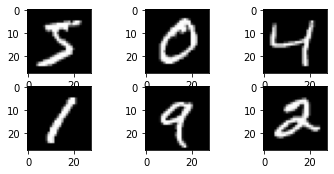

In [5]:
# plot first few images
for i in range(6):
	# define subplot
	plt.subplot(330 + 1+ i)
	# plot raw pixel data
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

## 3. Prepare data 

In [6]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")




x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## 4. Modeling Building

In [8]:
model=Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3)) # Dropout, one form of regularization
model.add (Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add (MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add( Dropout(0.5))
#model.add(Flatten())
model.add(Dense(10, activation='softmax'))
#model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1600)              0

2021-09-23 10:24:07.374794: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


2021-09-23 10:24:13.871145: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
422/422 [==============================] - 15s 35ms/step - loss: 0.4272 - accuracy: 0.8686 - val_loss: 0.0922 - val_accuracy: 0.9757
Epoch 2/5
422/422 [==============================] - 15s 34ms/step - loss: 0.1284 - accuracy: 0.9599 - val_loss: 0.0631 - val_accuracy: 0.9817
Epoch 3/5
422/422 [==============================] - 15s 34ms/step - loss: 0.0988 - accuracy: 0.9696 - val_loss: 0.0528 - val_accuracy: 0.9853
Epoch 4/5
422/422 [==============================] - 15s 35ms/step - loss: 0.0854 - accuracy: 0.9733 - val_loss: 0.0477 - val_accuracy: 0.9865
Epoch 5/5
422/422 [==============================] - 15s 35ms/step - loss: 0.0753 - accuracy: 0.9764 - val_loss: 0.0413 - val_accuracy: 0.9883


## 5.  Model Evaluation  and Probability

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.03916003555059433
Test accuracy: 0.986299991607666


In [14]:
probability_model = tf.keras.Sequential([ model, tf.keras.layers.Softmax() ])
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0.08533715, 0.08533715, 0.08533795, 0.08533894, 0.08533715,
        0.08533715, 0.08533715, 0.23196295, 0.08533715, 0.08533728],
       [0.08534564, 0.08534393, 0.23191534, 0.08534018, 0.08534015,
        0.08534015, 0.0853531 , 0.08534015, 0.08534119, 0.08534015],
       [0.08534947, 0.23177327, 0.08535268, 0.08534924, 0.08540738,
        0.08534937, 0.08535401, 0.08536034, 0.08535479, 0.08534946],
       [0.23174098, 0.08535117, 0.08536008, 0.08535118, 0.08535118,
        0.0853514 , 0.08543927, 0.08535127, 0.08535196, 0.08535152],
       [0.08533986, 0.08533985, 0.08533987, 0.08533985, 0.23192027,
        0.08533985, 0.08533988, 0.08534013, 0.08533987, 0.08536065]],
      dtype=float32)>

# 6. Testing the model

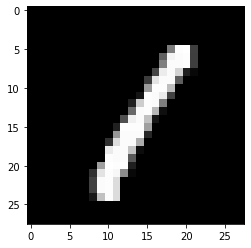

In [15]:
img = x_train[3]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [16]:
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted : {}".format(argmax(p)))

predicted : 1
